CMPT 980 - Assignment 4
Puria Azadi Moghadam - Student No: 301406080

# **Part 1:**

In [1]:
 import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras import Sequential 
from matplotlib.image import imread
import sklearn
import os
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import numpy as np
from time import time



Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose,Flatten,Dense,BatchNormalization
from tensorflow.python.keras import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.
x_test = x_test/ 255.
x_train = np.reshape(x_train, (len(x_train), 784, ))
x_test = np.reshape(x_test, (len(x_test), 784, ))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
print(x_train.shape)

(60000, 784)


In [69]:
batch =128

input_dense = Input((784,))
e_dense = Dense(500, activation='relu',input_shape =(784 , ))(input_dense)
e_dense = Dense(200, activation='relu')(e_dense)
encoded_dense = Dense(2, activation='relu')(e_dense)

d_dense = Dense(200, activation='relu')(encoded_dense)
d_dense = Dense(500, activation='relu')(d_dense)
decoded_dense = Dense(784, activation='sigmoid')(d_dense)

model = Model(input_dense, decoded_dense)
model.summary()

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_31 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 402       
_________________________________________________________________
dense_33 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_34 (Dense)             (None, 500)               100500    
_________________________________________________________________
dense_35 (Dense)             (None, 784)               392

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0675 - val_loss: 0.0594
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0518 - val_loss: 0.0464
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0449 - val_loss: 0.0433
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0426 - val_loss: 0.0418
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0413 - val_loss: 0.0405
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0402 - val_loss: 0.0398
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0395 - val_loss: 0.0391
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0389 - val_loss: 0.0389
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0385 - val_loss: 0.0384
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0381 - val_lo

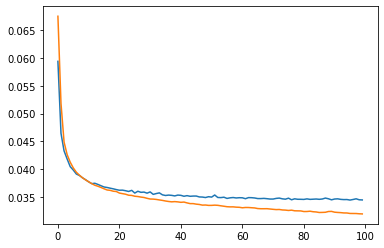

In [70]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss']) 

**Plot of Loss vs Epochs**

**Yellow plot = Train Loss**

**Blue Plot = Validation Loss**

100/100 [==============================] - 0s 2ms/step


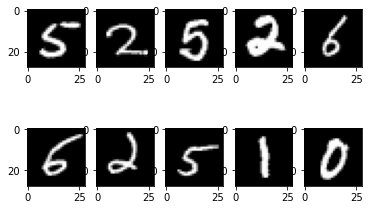

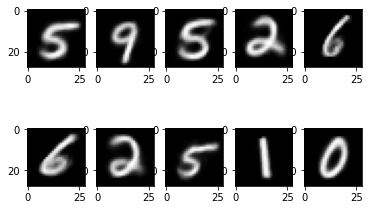

In [20]:
tests_fake = model.predict(x_test, verbose=1, batch_size=100)
import random
data=[]
for i in range(10):
  data.append(int(random.random()*10000/int(1)))
  #print(data)
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[data[i]].reshape(28,28), cmap='gray')
plt.figure()
for i in range(10):
  #print(data)
  plt.subplot(2,5,i+1)
  x =tests_fake[data[i]].reshape(28,28)
  plt.imshow(x.reshape(28,28), cmap='gray')

**First two rows are input images which Test images from MNIST dataset. 
Second two rows are output generated images regarding to above inputs.**

# **Part 2:**

In [1]:
 import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras import Sequential 
from matplotlib.image import imread
import sklearn
import os
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import numpy as np
from time import time



Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train / 255.
x_test = x_test/ 255.
x_train = np.reshape(x_train, (len(x_train), 28,28,1))
x_test = np.reshape(x_test, (len(x_test), 28,28,1 ))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose,Flatten,Dense,BatchNormalization
from tensorflow.python.keras import Model

## **Bottleneck = 2 Pixels:** **bold text**

In [6]:
inp_cnn = Input((28, 28,1))
encoder_cnn = Conv2D(64, (3, 3), activation='relu', padding='same')(inp_cnn)
encoder_cnn = MaxPooling2D((2, 2))(encoder_cnn)
encoder_cnn = Conv2D(64, (3, 3), activation='relu',padding='same')(encoder_cnn)
encoder_cnn = MaxPooling2D((2, 2))(encoder_cnn)
encoder_cnn = Conv2D(64, (3, 3), activation='relu',padding='same')(encoder_cnn)
encoder_cnn = MaxPooling2D((2, 2))(encoder_cnn)
encoder_cnn = Conv2D(2, (3, 3), activation='relu',padding='same')(encoder_cnn)
encoded_cnn = MaxPooling2D((2, 2))(encoder_cnn)

decoder_cnn = Conv2DTranspose(2,(3, 3), strides=2, activation='relu')(encoded_cnn)
decoder_cnn = Conv2DTranspose(64,(3, 3), strides=2, activation='relu')(decoder_cnn)
# d = BatchNormalization()(d)
decoder_cnn = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(decoder_cnn)
# d = BatchNormalization()(d)
decoder_cnn = Conv2DTranspose(64,(3, 3),strides=2, activation='relu', padding='same')(decoder_cnn)
decoded_cnn = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder_cnn)

ae_cnn = Model(inp_cnn, decoded_cnn)
ae_cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0     

Epoch 1/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0798 - val_loss: 0.0588
Epoch 2/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0570 - val_loss: 0.0553
Epoch 3/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0547 - val_loss: 0.0541
Epoch 4/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0540 - val_loss: 0.0538
Epoch 5/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0534 - val_loss: 0.0532
Epoch 6/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0529 - val_loss: 0.0524
Epoch 7/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0525 - val_loss: 0.0521
Epoch 8/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0521 - val_loss: 0.0514
Epoch 9/200
469/469 [==============================] - 7s 15ms/step - loss: 0.0517 - val_loss: 0.0516
Epoch 10/200
469/469 [==============================] - 7s 15ms/step - loss: 0.051

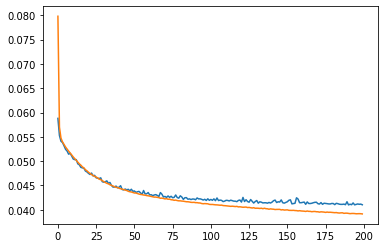

In [36]:
from tensorflow.python.keras.optimizers import Adam
ae_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00035, beta_1=0.9, beta_2=0.999), loss="mse")
history = ae_cnn.fit(x_train, x_train, epochs=200, batch_size=128, validation_data=(x_test, x_test))
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss']) 

**Plot of Loss vs Epochs**

**Yellow plot = Train Loss**

**Blue Plot = Validation Loss**

100/100 [==============================] - 1s 6ms/step


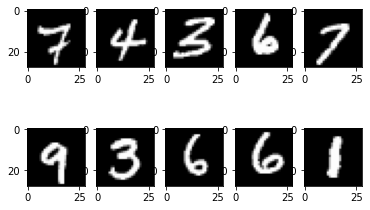

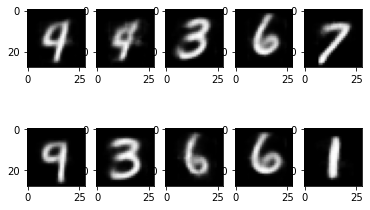

In [40]:
tests_fake = ae_cnn.predict(x_test, verbose=1, batch_size=100)
import random
data=[]
for i in range(10):
  data.append(int(random.random()*10000/int(1)))
  #print(data)
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[data[i]].reshape(28,28), cmap='gray')
plt.figure()
for i in range(10):
  #print(data)
  plt.subplot(2,5,i+1)
  x =tests_fake[data[i]].reshape(28,28)
  plt.imshow(x.reshape(28,28), cmap='gray')


**First two rows are input images which Test images from MNIST dataset. 
Second two rows are output generated images regarding to above inputs.**


## **Bottleneck = 3 Pixels:** **bold text**
**We increase the bottleneck to 3**:

In [7]:
inp_cnn_3 = Input((28, 28,1))
encoder_cnn_3 = Conv2D(64, (3, 3), activation='relu', padding='same')(inp_cnn_3)
encoder_cnn_3 = MaxPooling2D((2, 2))(encoder_cnn_3)
encoder_cnn_3 = Conv2D(64, (3, 3), activation='relu',padding='same')(encoder_cnn_3)
encoder_cnn_3 = MaxPooling2D((2, 2))(encoder_cnn_3)
encoder_cnn_3 = Conv2D(64, (3, 3), activation='relu',padding='same')(encoder_cnn_3)
encoder_cnn_3 = MaxPooling2D((2, 2))(encoder_cnn_3)
encoder_cnn_3 = Conv2D(3, (3, 3), activation='relu',padding='same')(encoder_cnn_3)
encoded_cnn_3 = MaxPooling2D((2, 2))(encoder_cnn_3)

decoder_cnn_3 = Conv2DTranspose(3,(3, 3), strides=2, activation='relu')(encoded_cnn_3)
decoder_cnn_3 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu')(decoder_cnn_3)
# d = BatchNormalization()(d)
decoder_cnn_3 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(decoder_cnn_3)
# d = BatchNormalization()(d)
decoder_cnn_3 = Conv2DTranspose(64,(3, 3),strides=2, activation='relu', padding='same')(decoder_cnn_3)
decoded_cnn_3 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder_cnn_3)

ae_cnn_3 = Model(inp_cnn_3, decoded_cnn_3)
ae_cnn_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0   

Epoch 1/400
469/469 [==============================] - 7s 15ms/step - loss: 0.0870 - val_loss: 0.0605
Epoch 2/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0532 - val_loss: 0.0500
Epoch 3/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0487 - val_loss: 0.0474
Epoch 4/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0473 - val_loss: 0.0461
Epoch 5/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0463 - val_loss: 0.0454
Epoch 6/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0455 - val_loss: 0.0444
Epoch 7/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0448 - val_loss: 0.0439
Epoch 8/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0442 - val_loss: 0.0433
Epoch 9/400
469/469 [==============================] - 7s 14ms/step - loss: 0.0437 - val_loss: 0.0430
Epoch 10/400
469/469 [==============================] - 7s 15ms/step - loss: 0.043

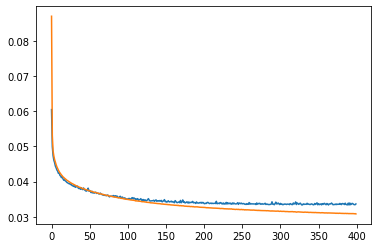

In [8]:
from tensorflow.python.keras.optimizers import Adam
ae_cnn_3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999), loss="mse")
history = ae_cnn_3.fit(x_train, x_train, epochs=400, batch_size=128, validation_data=(x_test, x_test))
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss']) 

**Plot of Loss vs Epochs**

**Yellow plot = Train Loss**

**Blue Plot = Validation Loss**

100/100 [==============================] - 1s 6ms/step


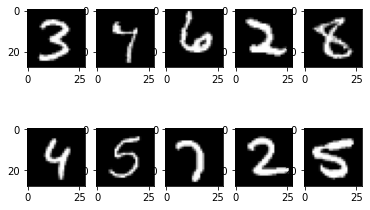

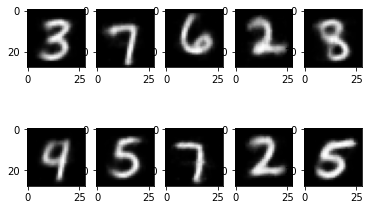

In [15]:
tests_fake = ae_cnn_3.predict(x_test, verbose=1, batch_size=100)
import random
data=[]
for i in range(10):
  data.append(int(random.random()*10000/int(1)))
  #print(data)
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[data[i]].reshape(28,28), cmap='gray')
plt.figure()
for i in range(10):
  #print(data)
  plt.subplot(2,5,i+1)
  x =tests_fake[data[i]].reshape(28,28)
  plt.imshow(x.reshape(28,28), cmap='gray')


**First two rows are input images which Test images from MNIST dataset. 
Second two rows are output generated images regarding to above inputs.**


## **Bottleneck = 4 Pixels:** **bold text**
**We increase the bottleneck to 4**:

In [26]:
inp_cnn_4 = Input((28, 28,1))
encoder_cnn_4 = Conv2D(64, (3, 3), activation='relu', padding='same')(inp_cnn_4)
encoder_cnn_4 = MaxPooling2D((2, 2))(encoder_cnn_4)
encoder_cnn_4 = Conv2D(64, (3, 3), activation='relu',padding='same')(encoder_cnn_4)
encoder_cnn_4 = MaxPooling2D((2, 2))(encoder_cnn_4)
encoder_cnn_4 = Conv2D(64, (3, 3), activation='relu',padding='same')(encoder_cnn_4)
encoder_cnn_4 = MaxPooling2D((2, 2))(encoder_cnn_4)
encoder_cnn_4 = Conv2D(4, (3, 3), activation='relu',padding='same')(encoder_cnn_4)
encoded_cnn_4 = MaxPooling2D((2, 2))(encoder_cnn_4)

decoder_cnn_4 = Conv2DTranspose(4,(3, 3), strides=2, activation='relu')(encoded_cnn_4)
decoder_cnn_4 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu')(decoder_cnn_4)
# d = BatchNormalization()(d)
decoder_cnn_4 = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(decoder_cnn_4)
# d = BatchNormalization()(d)
decoder_cnn_4 = Conv2DTranspose(64,(3, 3),strides=2, activation='relu', padding='same')(decoder_cnn_4)
decoded_cnn_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder_cnn_4)

ae_cnn_4 = Model(inp_cnn_4, decoded_cnn_4)
ae_cnn_4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0   

Epoch 1/400
469/469 [==============================] - 10s 21ms/step - loss: 0.0812 - val_loss: 0.0570
Epoch 2/400
469/469 [==============================] - 10s 20ms/step - loss: 0.0527 - val_loss: 0.0479
Epoch 3/400
469/469 [==============================] - 10s 20ms/step - loss: 0.0457 - val_loss: 0.0436
Epoch 4/400
469/469 [==============================] - 10s 20ms/step - loss: 0.0429 - val_loss: 0.0421
Epoch 5/400
469/469 [==============================] - 10s 20ms/step - loss: 0.0412 - val_loss: 0.0404
Epoch 6/400
469/469 [==============================] - 10s 20ms/step - loss: 0.0399 - val_loss: 0.0392
Epoch 7/400
469/469 [==============================] - 10s 21ms/step - loss: 0.0390 - val_loss: 0.0388
Epoch 8/400
469/469 [==============================] - 10s 21ms/step - loss: 0.0380 - val_loss: 0.0378
Epoch 9/400
469/469 [==============================] - 10s 20ms/step - loss: 0.0373 - val_loss: 0.0366
Epoch 10/400
469/469 [==============================] - 10s 20ms/step - l

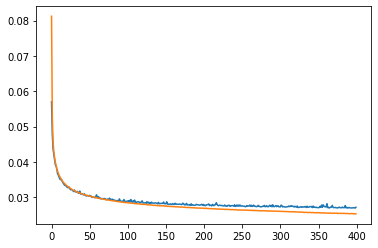

In [27]:
from tensorflow.python.keras.optimizers import Adam
ae_cnn_4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999), loss="mse")
history = ae_cnn_4.fit(x_train, x_train, epochs=400, batch_size=128, validation_data=(x_test, x_test))
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss']) 

**Plot of Loss vs Epochs**

**Yellow plot = Train Loss**

**Blue Plot = Validation Loss**

100/100 [==============================] - 1s 7ms/step


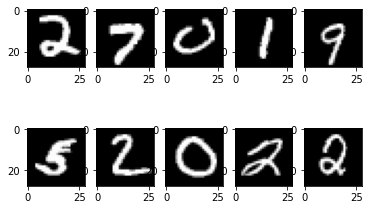

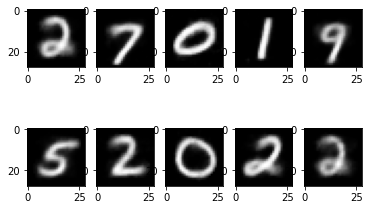

In [25]:
tests_fake = ae_cnn_4.predict(x_test, verbose=1, batch_size=100)
import random
data=[]
for i in range(10):
  data.append(int(random.random()*10000/int(1)))
  #print(data)
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[data[i]].reshape(28,28), cmap='gray')
plt.figure()
for i in range(10):
  #print(data)
  plt.subplot(2,5,i+1)
  x =tests_fake[data[i]].reshape(28,28)
  plt.imshow(x.reshape(28,28), cmap='gray')


**First two rows are input images which Test images from MNIST dataset. 
Second two rows are output generated images regarding to above inputs.**


  **As it can be seen in above sections, the encoded images for all bottleneck equal to 2, 3, 4 are readable for human, however, it seems that images reconstructed from bottleneck with the size of 2 do not have enough quality and may using bottleneck = 3 or 4 be better.
  Also, as we increased the number of pixels in bottleneck, the train and validation loss decreased.**

# **Part3:**

## **Part 3.1:**
**In this part we enter random numbers to the decoder and get the outputs:**

(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)


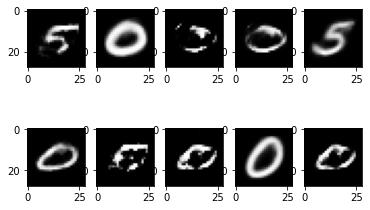

In [72]:
import random
encoded_fake = Input(shape=(2,))
decoder_fake = encoded_fake
for L in model.layers[4:]:
    decoder_fake = L(decoder_fake)
decoder_f = Model(encoded_fake, decoder_fake)
INTERVAL = 10
for i in range(10):
    #In order to make uniform random number use the next line:
    #input_encoded = np.array([random.random(),random.random()]).reshape(1,2)*INTERVAL

    #In order to make gaussian random number use the next line:
    input_encoded = np.random.normal(0, 1, 2).reshape(1,2)
    print(input_encoded.shape)
    #input_encoded = np.random.rand(2,1).reshape((-1,2,))
    print(input_encoded.shape)
    plt.subplot(2,5,i+1)
    plt.imshow(decoder_f.predict(input_encoded).reshape(-1,2).reshape(28,28), cmap='gray')




**As it can be seen above, the produced number are stuck at 0 and 5**. 

**Moreover some of produced numbers are not readable.**

## **Part 3.2:**
**In this part we try to restrict the AutoEncoder hidden bottleneck layer(s) to have a standard multi-variate normal distribution with mean zeroes and the identity matrix as variance.**

In [0]:
from keras.datasets import mnist
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose,Flatten,Dense,BatchNormalization, Normalization, LayerNormalization
from tensorflow.python.keras import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [46]:
x_train = x_train / 255.
x_test = x_test/ 255.
x_train = np.reshape(x_train, (len(x_train), 784, ))
x_test = np.reshape(x_test, (len(x_test), 784, ))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
print(x_train.shape)

(60000, 784)


In [47]:
batch =128

input_dense_2 = Input((784,))
e_dense_2 = Dense(500, activation='relu',input_shape =(784 , ))(input_dense_2)
e_dense_2 = Dense(200, activation='relu')(e_dense_2)
encoded_dense_2 = Dense(2, activation='relu')(e_dense_2)
Normalization = BatchNormalization(center=False, scale= False)(encoded_dense_2)
d_dense_2 = Dense(200, activation='relu')(Normalization)
d_dense_2 = Dense(500, activation='relu')(d_dense_2)
decoded_dense_2 = Dense(784, activation='sigmoid')(d_dense_2)

model_2 = Model(input_dense_2, decoded_dense_2)
model_2.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 402       
_________________________________________________________________
batch_normalization_2 (Batch (None, 2)                 4         
_________________________________________________________________
dense_27 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_28 (Dense)             (None, 500)               100

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0599 - val_loss: 0.0507
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0490 - val_loss: 0.0468
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0469 - val_loss: 0.0450
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0457 - val_loss: 0.0439
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0446 - val_loss: 0.0431
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0438 - val_loss: 0.0424
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0431 - val_loss: 0.0421
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0427 - val_loss: 0.0413
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0422 - val_loss: 0.0405
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0419 - val_lo

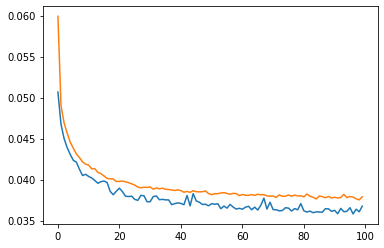

In [49]:
model_2.compile(optimizer='adam', loss='mse')
history = model_2.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

**Plot of Loss vs Epochs**

**Yellow plot = Train Loss**

**Blue Plot = Validation Loss**

**Then, we randomly generate inputs to the bottleneck layer that are drawn from the multi-variate standard normal distribution, and use the random inputs to generate new images.**

(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)


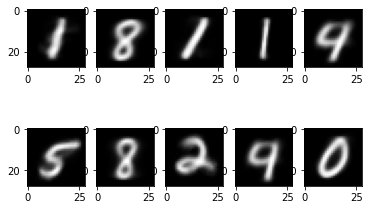

In [73]:
import random
encoded_fake_3 = Input(shape=(2,))
decoder_fake_3 = encoded_fake_3
for L in model_2.layers[5:]:
    decoder_fake_3 = L(decoder_fake_3)
decoder_f_3 = Model(encoded_fake_3, decoder_fake_3)
#INTERVAL = 10
for i in range(10):
    # input_encoded = np.array([random.random(),random.random()]).reshape(1,2)*INTERVAL
    input_encoded = np.random.normal(0, 1, 2).reshape(1,2)
    print(input_encoded.shape)
    #input_encoded = np.random.rand(2,1).reshape((-1,2,))
    print(input_encoded.shape)
    plt.subplot(2,5,i+1)
    plt.imshow(decoder_f_3.predict(input_encoded).reshape(-1,2).reshape(28,28), cmap='gray')

## **Part 3.3:**
**We have seen that the produced number images are limited and could not produce all numbers.** **More Imortantly, the produced images were unreadable, they did't have enough quality ans some of them were almost meaningless.** 

**On the other hand, images reconstructed in part3.2 were readable and had good qualities. Also, the produced images by this autoencoder were not stuck at any digits and were not limited to small number of digits.**

**One of the reason that some resulted images from Part3.1 were not recognizable was the fact that the autoencoder was not restricted. The encoder could encode images anywhere in latent space, and the decoder possibly have not seen any data in latent space around the input random spot. Therefore, it could not decode the input random code to some recognizable handwritten digit.**

**This difference between part3.1 and 3.2 happened since we restricted the latent variables in part 3.2 to standard normal distribution.Here, the encoder tries to encode the input images to clusters around (0,0) in latent space leading to much smoother latent area. This results in the ability of decoder to assign almost all the areas around (0,0) in latent space to handwritten digits. Hence, when we sample the multivarate normal distribution and send it to decoder, it can decode them very well**

## **Part 4:**
**Here, we  build a Variational Auto Encoder.**

In [2]:
 import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras import Sequential 
from matplotlib.image import imread
import sklearn
import os
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import numpy as np
from time import time



Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose,Flatten,Dense,BatchNormalization
from tensorflow.python.keras import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train = x_train / 255.
x_test = x_test/ 255.
x_train = np.reshape(x_train, (len(x_train), 784, ))
x_test = np.reshape(x_test, (len(x_test), 784, ))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
print(x_train.shape)

(60000, 784)


In [5]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.losses import mse
from tensorflow.python.keras.layers import Lambda
batch =128
def sampler(args):
  encoded_dense_3_mean, encoded_dense_3_var = args
  # epsilon = K.random_normal(mean =encoded_dense_3_mean,  shape=(128, 2))
  e = K.random_normal(shape=(K.shape(encoded_dense_3_mean)[0], K.shape(encoded_dense_3_mean)[1]))
  return encoded_dense_3_mean + K.exp(0.5 * encoded_dense_3_var) * e

input_dense_3 = Input((784,))
e_dense_3 = Dense(500, activation='relu',input_shape =(784 , ))(input_dense_3)
e_dense_3 = Dense(200, activation='relu')(e_dense_3)
# encoded_dense_3 = Dense(2, activation='relu')(e_dense_3)

encoded_dense_3_mean = Dense(2)(e_dense_3)
encoded_dense_3_var = Dense(2)(e_dense_3)
samples = Lambda(sampler, output_shape=(2,))([encoded_dense_3_mean, encoded_dense_3_var])

d_dense_3 = Dense(200, activation='relu')(samples)
d_dense_3 = Dense(500, activation='relu')(d_dense_3)
decoded_dense_3 = Dense(784, activation='sigmoid')(d_dense_3)

model_3 = Model(input_dense_3, decoded_dense_3)
model_3.summary()

Reconstruction_loss = mse(input_dense_3, decoded_dense_3)*784
KL_Divergance_loss = K.sum(1 + encoded_dense_3_var - K.square(encoded_dense_3_mean) - K.exp(encoded_dense_3_var), axis=-1) * (-.5)
model_3.add_loss(K.mean(Reconstruction_loss + KL_Divergance_loss))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          100200      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            402         dense_1[0][0]                    
______________________________________________________________________________________________

Epoch 1/250
469/469 [==============================] - 2s 4ms/step - loss: 48.9432 - val_loss: 42.9239
Epoch 2/250
469/469 [==============================] - 2s 3ms/step - loss: 41.7937 - val_loss: 40.7462
Epoch 3/250
469/469 [==============================] - 1s 3ms/step - loss: 40.1553 - val_loss: 39.4429
Epoch 4/250
469/469 [==============================] - 2s 3ms/step - loss: 39.0888 - val_loss: 38.6020
Epoch 5/250
469/469 [==============================] - 1s 3ms/step - loss: 38.2877 - val_loss: 38.0058
Epoch 6/250
469/469 [==============================] - 2s 3ms/step - loss: 37.7017 - val_loss: 37.4201
Epoch 7/250
469/469 [==============================] - 2s 3ms/step - loss: 37.2927 - val_loss: 37.1295
Epoch 8/250
469/469 [==============================] - 2s 3ms/step - loss: 36.9322 - val_loss: 36.8462
Epoch 9/250
469/469 [==============================] - 2s 3ms/step - loss: 36.6581 - val_loss: 36.5505
Epoch 10/250
469/469 [==============================] - 2s 3ms/step - los

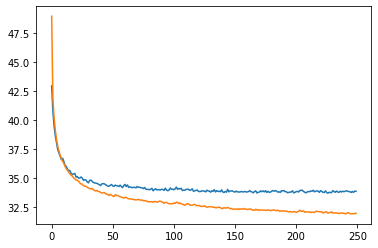

In [6]:

model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),)
# model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(x_train, x_train, epochs=250, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
plt.plot(history.history['val_loss']) 
plt.plot(history.history['loss']) 

**Plot of Loss vs Epochs**

**Yellow plot = Train Loss**

**Blue Plot = Validation Loss**


**we enter random numbers to the decoder and get the outputs:**

0
1
2
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)


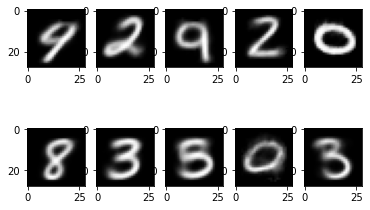

In [7]:
import random
encoded_fake = Input(shape=(2,))
decoder_fake = encoded_fake
for i,L in enumerate(model_3.layers[6:9]):
    print(i)
    decoder_fake = L(decoder_fake)
decoder_f = Model(encoded_fake, decoder_fake)
INTERVAL = 10
for i in range(10):
    #input_encoded = np.array([random.random(),random.random()]).reshape(1,2)*INTERVAL
    input_encoded = np.random.normal(0, 1, 2).reshape(1,2)
    print(input_encoded.shape)
    #input_encoded = np.random.rand(2,1).reshape((-1,2,))
    print(input_encoded.shape)
    plt.subplot(2,5,i+1)
    plt.imshow(decoder_f.predict(input_encoded).reshape(-1,2).reshape(28,28), cmap='gray')



**If we give inputs images and get output images:**

100/100 [==============================] - 0s 2ms/step


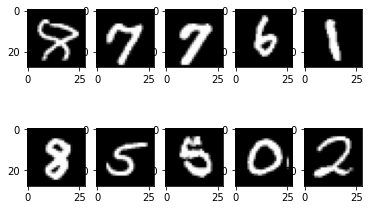

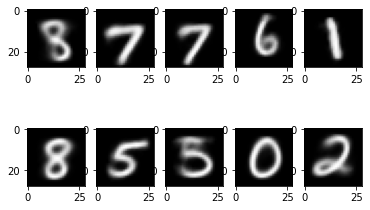

In [9]:
tests_fake = model_3.predict(x_test, verbose=1, batch_size=100)
import random
data=[]
for i in range(10):
  data.append(int(random.random()*10000/int(1)))
  #print(data)
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[data[i]].reshape(28,28), cmap='gray')
plt.figure()
for i in range(10):
  #print(data)
  plt.subplot(2,5,i+1)
  x =tests_fake[data[i]].reshape(28,28)
  plt.imshow(x.reshape(28,28), cmap='gray')

**First two rows are input images which Test images from MNIST dataset. 
Second two rows are output generated images regarding to above inputs.**


**As it can be seen in both above images, the reconstructed images are still blurry which is one the disadvantages of autoencoders. However, the produced images even have better quality of produced.** 

**When we feed the decoder with random numbers, it decode them to a more various digits with higher qualities**